## Airline Customer Data Utilized to Find Similar Customers Clusters.
#### This exercise analyzes airline customer data using K-Means to determine similar customer clusters.  
#### K-means is a popular clustering algorithm that identifies similar data points (clusters). More information can be found here:
###### https://stanford.edu/~cpiech/cs221/handouts/kmeans.html


In [35]:
# import Libraries for this exercise
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.simplefilter(action="ignore", category=FutureWarning)

# Create Airline Customer Data in Pandas Dataframe. The first column contains how many months the customer account has been active
# and the second column contains the Current Mileage Balance reward points.
data = pd.DataFrame([[60,41000],
[61,46000],
[62,49000],
[63,39000],
[62,45000],
[61,50000],
[60,46000],
[50,76000],
[57,82000],
[60,58000],
[55,80000],
[54,81000],
[57,84000],
[53,81000],
[32,90000],
[36,86000],
[39,90000],
[31,91000],
[37,85000],
[39,88000]],
    columns=['AccountAge', 'CurrentMileageBalance'])

# Pandas head to show top rows of data
data.head()

,AccountAge,CurrentMileageBalance
0,60,41000
1,61,46000
2,62,49000
3,63,39000
4,62,45000


#### Histograms are created using seaborn histplot to gain a better understanding of the account age and current mileage balance distributions.

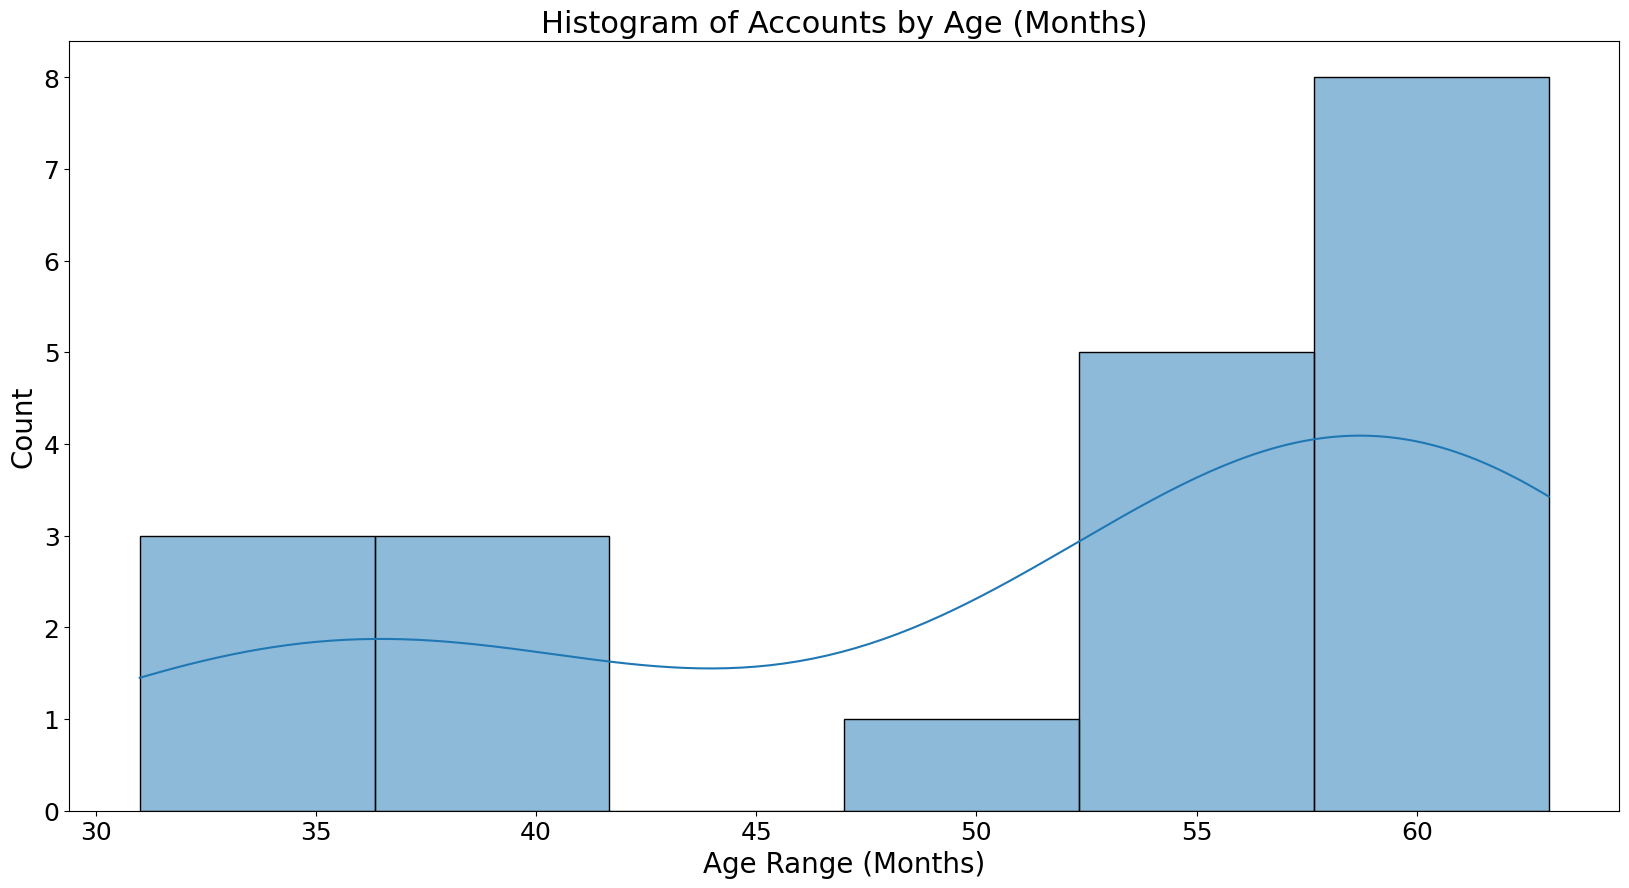

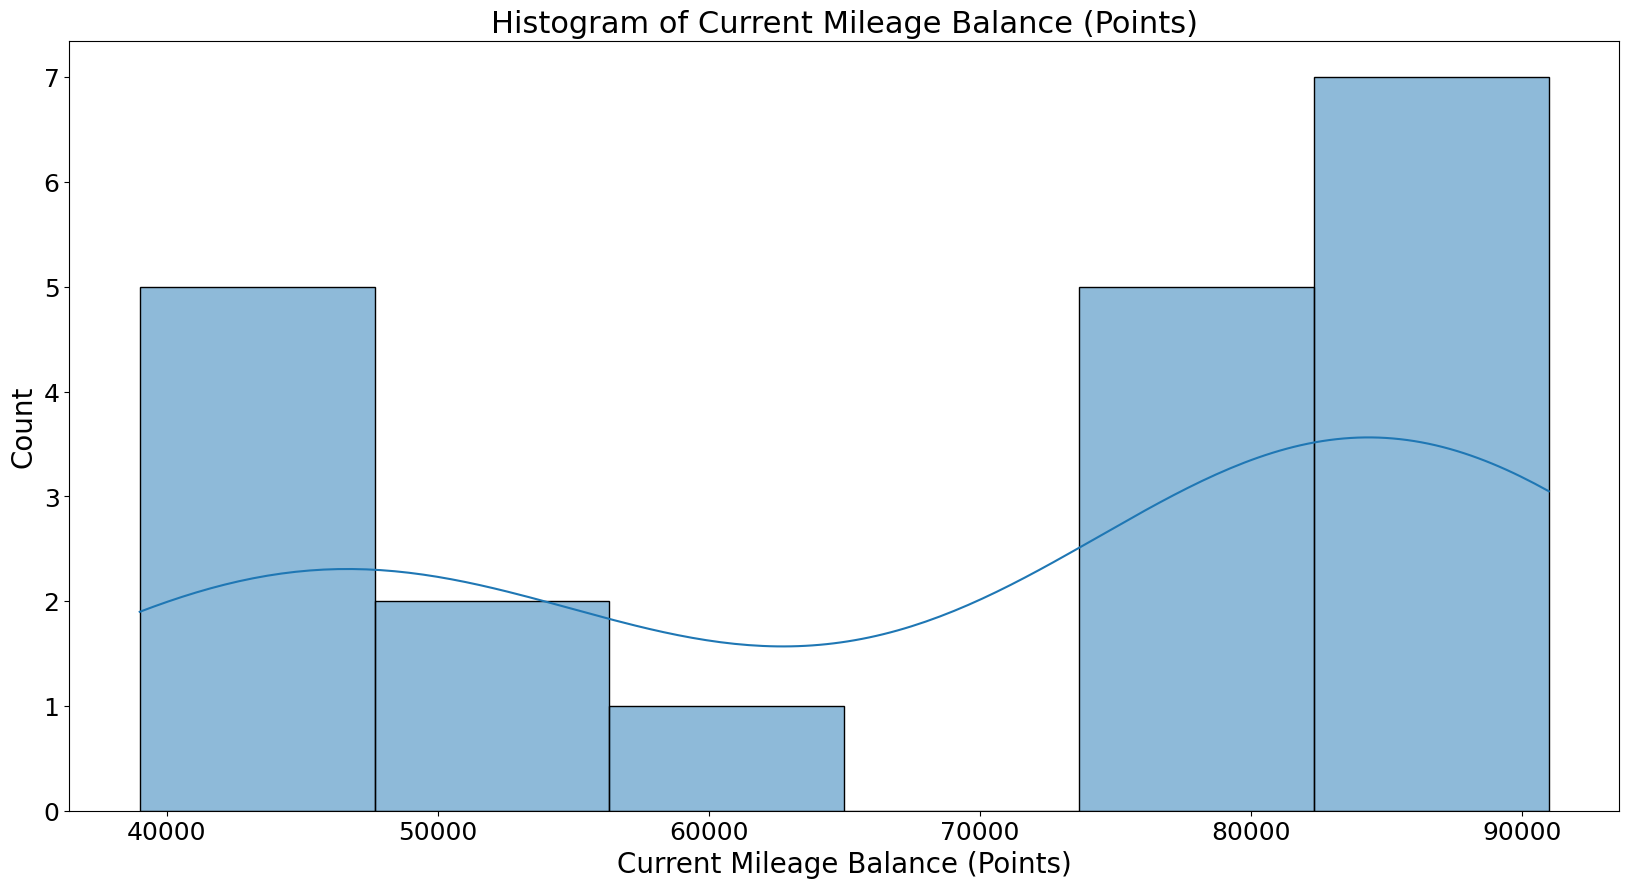

In [36]:
# Set AccountAge plot figure size and tick sizes. 
plot.figure(figsize=(20, 10))
# Set x-axis and y-axis tick size
plot.xticks(fontsize=18)
plot.yticks(fontsize=18)
# Plot the histogram for AccountAge
# kde=True, Adds the kernel density estimate (KDE) line used to visualize the distribution of observations in a histogram
accountAge = sns.histplot(data['AccountAge'], kde=True)  # kde=True adds the KDE line
plot.title('Histogram of Accounts by Age (Months)', fontsize=22)
plot.xlabel('Age Range (Months)', fontsize=20)
plot.ylabel('Count', fontsize=20)
plot.show()


# Set CurrentMileageBalance plot figure size and tick sizes. 
plot.figure(figsize=(20, 10))
# Set x-axis and y-axis tick size
plot.xticks(fontsize=18)
plot.yticks(fontsize=18)
# Plot the histogram for CurrentMileageBalanace
# kde=True, Adds the kernel density estimate (KDE) line used to visualize the distribution of observations in a histogram
mileageCoords = sns.histplot(data['CurrentMileageBalance'], kde=True)
plot.title('Histogram of Current Mileage Balance (Points)', fontsize=22)
plot.xlabel('Current Mileage Balance (Points)', fontsize=20)
plot.ylabel('Count', fontsize=20)
plot.show()

### Now we will create ranges for the AccountAge variable and plot them on bar graph: 
#### time_above_71, time_56_70, time_41_55, time_26_40, and time_0_25

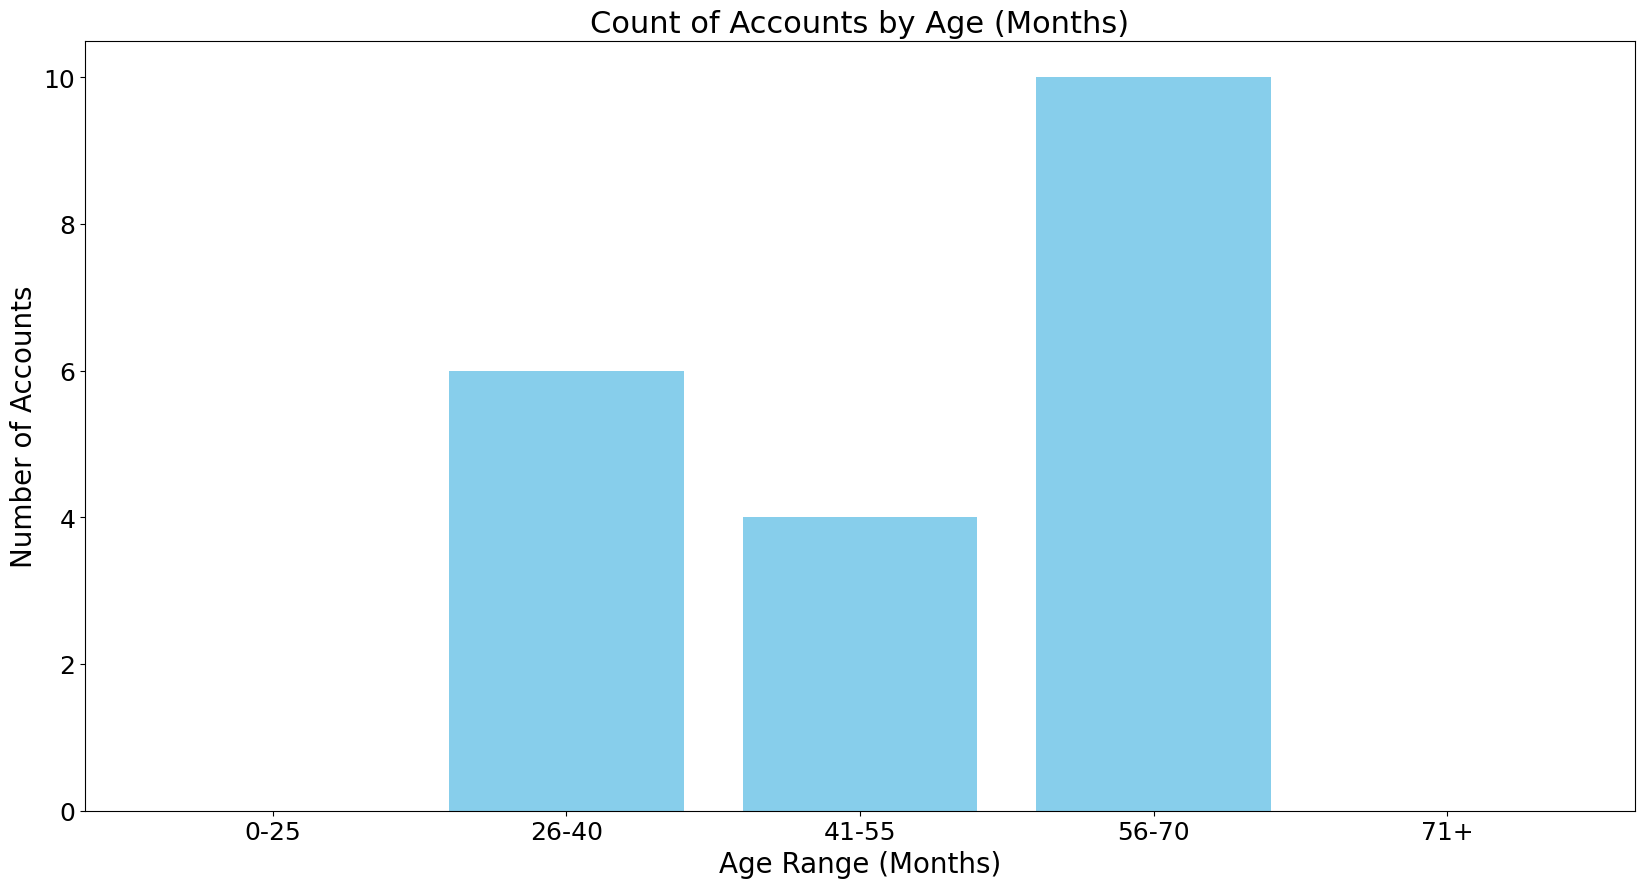

In [37]:
# Grouping data based on AccountAge ranges
time_above_71 = data.AccountAge[data.AccountAge >= 71]
time_56_70 = data.AccountAge[(data.AccountAge >= 56) & (data.AccountAge <= 70)]
time_41_55 = data.AccountAge[(data.AccountAge >= 41) & (data.AccountAge <= 55)]
time_26_40 = data.AccountAge[(data.AccountAge >= 26) & (data.AccountAge <= 40)]
time_0_25 = data.AccountAge[data.AccountAge <= 25]

# Plotting the graph using Matplotlib
plot.figure(figsize=(20, 10))
x_age_ax = ['0-25', '26-40', '41-55', '56-70', '71+']
y_age_ax = [
    len(time_0_25.values),
    len(time_26_40.values),
    len(time_41_55.values),
    len(time_56_70.values),
    len(time_above_71.values)
]

# Plotting the bar chart
plot.bar(x_age_ax, y_age_ax, color='skyblue')
# Set x-axis and y-axis tick size
plot.xticks(fontsize=18)
plot.yticks(fontsize=18) 
#Set chart title
plot.title('Count of Accounts by Age (Months)', fontsize=22)
# Set x-axis and y-axis labels
plot.xlabel('Age Range (Months)', fontsize=20)
plot.ylabel('Number of Accounts', fontsize=20)
plot.show()

#### The K value is the number of clusters for the k-means method. We will plot the K values for the range of 1 to 12 and visually identify 
#### where the number of clusters in the graph's "elbow."

The k and WCSS pairs are:
k = 1, WCSS = 40.0
k = 2, WCSS = 10.9
k = 3, WCSS = 1.69
k = 4, WCSS = 1.22
k = 5, WCSS = 0.81
k = 6, WCSS = 0.59
k = 7, WCSS = 0.45
k = 8, WCSS = 0.3
k = 9, WCSS = 0.23
k = 10, WCSS = 0.12
k = 11, WCSS = 0.1


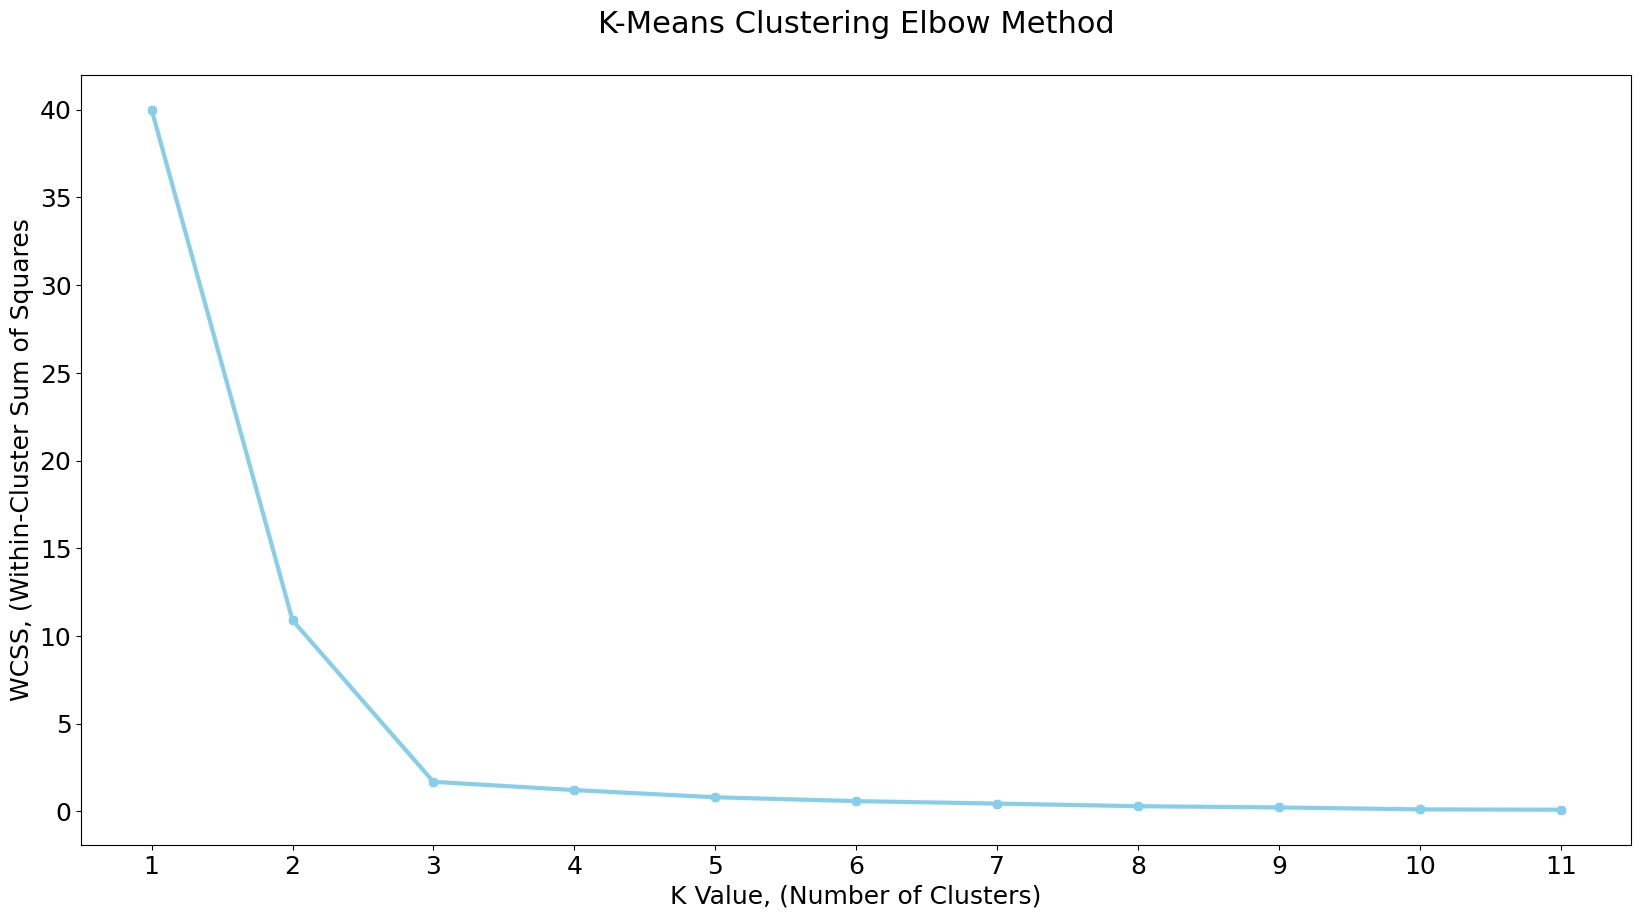

In [38]:
x_input = data.loc[:, ['AccountAge', 'CurrentMileageBalance']].values

# set random_state=0 in KMeans()
# Python code referenced: https://realpython.com/k-means-clustering-python/
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster also referenced

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 0,
}
# WCSS is within-cluster sum of squares, also known as inertia and is calculated for the current k value and 
# appended to the wcss list. WCSS measures how compact clusters are, while lower wcss values indicate tighter clusters.
wcss = []
print("The k and WCSS pairs are:")
for k in range(1,12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    inertia = kmeans.inertia_
    rounded_inertia = round(inertia, 2)
    wcss.append(rounded_inertia)
# Print the current value of k and the WCSS value
    print(f"k = {k}, WCSS = {rounded_inertia}")

# Plotting Graph
plot.figure(figsize=(20,10))
# Set x-axis ticks each k-values 1-12
plot.xticks(ticks=range(1, 12), fontsize=18)
plot.yticks(fontsize=18) 
# Plot x-values 1-12, and y-values as wcss
plot.plot(range(1, 12), wcss, linewidth=3, marker='8', color='skyblue')
plot.title('K-Means Clustering Elbow Method\n', fontsize=22)
plot.xlabel('K Value, (Number of Clusters)', fontsize=18)
plot.ylabel('WCSS, (Within-Cluster Sum of Squares', fontsize=18)
ax = plot.gca() # get axis handle
line = ax.get_lines()[0]
xydata = line.get_xydata()
plot.show()

#### There is a noticable elbow in the WCSS curve, which shows k = 3 is likely the best number of clusters for this exercise.
#### We will assign the number of clusters (n_clusters=3) and calculate/print the cluster centroid coordinates.

In [39]:
k_means=KMeans(n_clusters=3, random_state=0)
labels=k_means.fit_predict(x_input)

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster referenced
k_means.fit(scaled_features)
clusterCenters = k_means.cluster_centers_
print(k_means.cluster_centers_)


[[ 0.26337853  0.58888592]
 [ 0.88376436 -1.18386978]
 [-1.44173101  0.98960711]]


#### Finally, we will plot the points to see each cluster visually. 

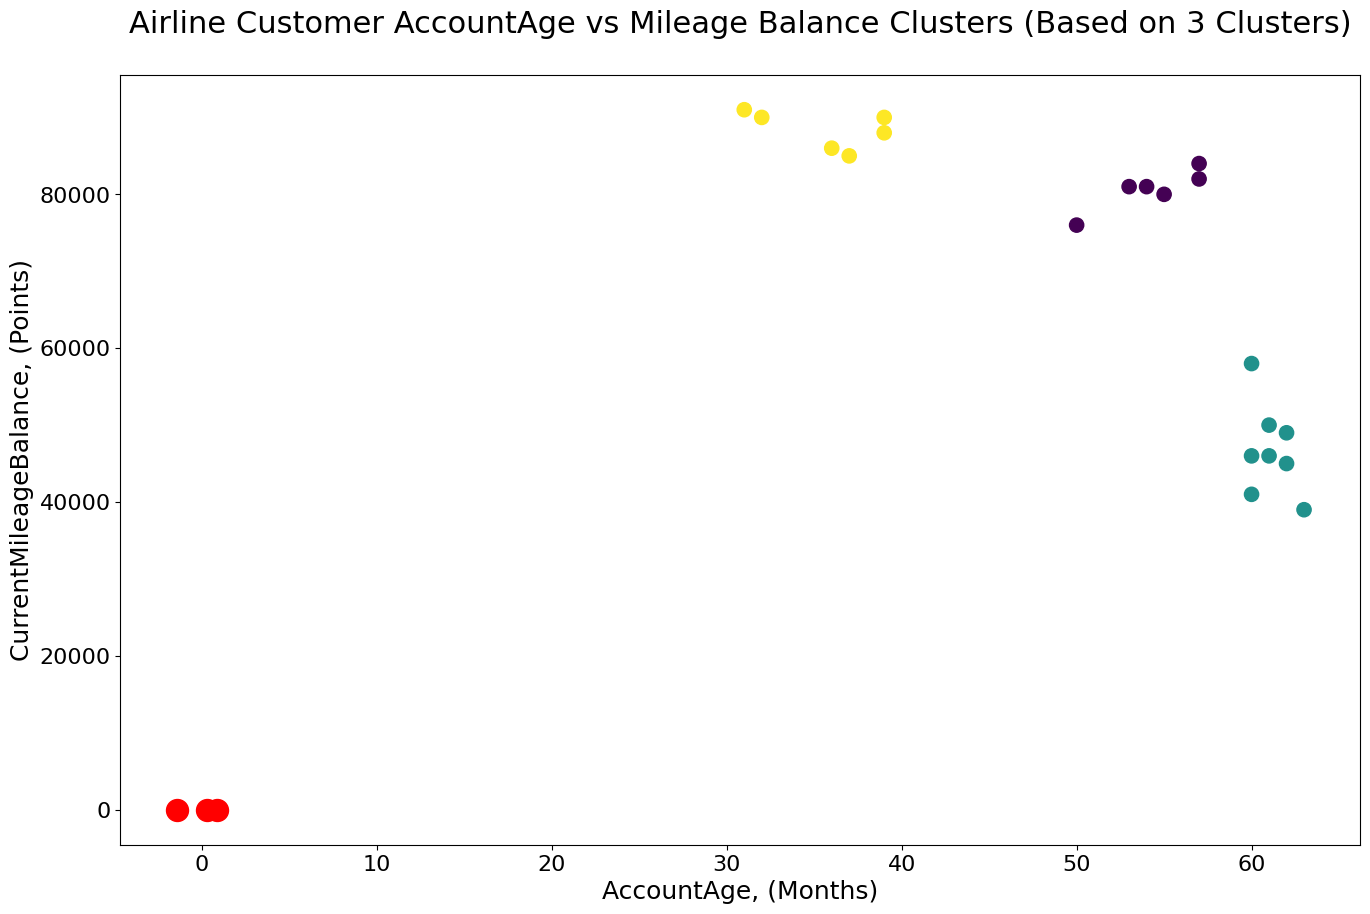

The list of point coordinates (AccountAge, CurrentMileageBalance:
[[60.0 41000.0]
 [61.0 46000.0]
 [62.0 49000.0]
 [63.0 39000.0]
 [62.0 45000.0]
 [61.0 50000.0]
 [60.0 46000.0]
 [50.0 76000.0]
 [57.0 82000.0]
 [60.0 58000.0]
 [55.0 80000.0]
 [54.0 81000.0]
 [57.0 84000.0]
 [53.0 81000.0]
 [32.0 90000.0]
 [36.0 86000.0]
 [39.0 90000.0]
 [31.0 91000.0]
 [37.0 85000.0]
 [39.0 88000.0]]


In [40]:
# Set size of plot
plot.figure(figsize = (16, 10))

# Plot the cluster plot
plot.scatter(x_input[:, 0], x_input[:,1], c = k_means.labels_, s = 105)
plot.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1] , color = 'red', s = 250)

# Set title, xlabel, and ylabel
plot.title('Airline Customer AccountAge vs Mileage Balance Clusters (Based on 3 Clusters)\n', fontsize = 22)
plot.xlabel('AccountAge, (Months)', fontsize=18)
plot.ylabel('CurrentMileageBalance, (Points)', fontsize=18)
# Set tick font size
plot.xticks(fontsize=16)
plot.yticks(fontsize=16) 

# Get the current figure object
current_figure = plot.gcf()

# Get the scatter plot objects from the figure
scatter_plots = current_figure.axes[0].collections

# Assuming you want the points from the first scatter plot
points = scatter_plots[0].get_offsets()

plot.show()
print("The list of point coordinates (AccountAge, CurrentMileageBalance:")
print(points)
